## **Explosive weapons Incidents: Phase 3 Project**


### **Author**: ALEX MWERA

### **Stakeholders & Main Problem**

My main stakeholder is humanitarian organizations like the UN and the Red Cross, who work to protect civilians in conflict zones. In this project, I aim to predict the type of explosive weapon used in attacks based on factors like location, sector affected, and the reported perpetrator. This can help improve early warnings, emergency response, and advocacy against the use of heavy weapons in populated areas.

### **Data Understanding and Preparation**
Data on explosive weapons incidents in 2025 was provided in a single file. The dataset contains detailed records of attacks involving explosive weapons, including information on the location, sector affected, reported perpetrator, and the type of weapon used.

While the dataset includes some impact data like whether aid workers or health workers were killed many of these fields had large amounts of missing values and were excluded from the analysis. These can be revisited and added in future work. For now, the focus remains on cleaning, encoding, and preparing key features that can help predict the type of explosive weapon used.

### **Import datasets**
The dataset used in this project was downloaded from the Humanitarian Data Exchange (HDX) and contains records of explosive weapons incidents that occurred in 2025. It includes key fields such as country, sector affected, reported perpetrator, and the type of explosive weapon used (which is the target variable in this project).

Dataset located at:
    https://data.humdata.org/dataset/729040e4-e253-44ca-b265-123d452738d6/resource/16f9803e-1831-4097-a99c-0c57ee7e34c6/download/2025-explosive-weapons-incident-data.xlsx

#### Load Dependencies

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn .model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#### Loading the Excel dataset and Converting it to dataframe

In [2]:
df_Explosive_weapons= pd.read_excel('2025-explosive-weapons-incident-data.xlsx')
df_Explosive_weapons.shape

(219, 22)

In [3]:
df_Explosive_weapons.head()

,Date,Event Description,Country,Country ISO,Admin 1,Latitude,Longitude,Geo Precision,Sector Affected,Provider,...,Reported Perpetrator,Reported Perpetrator Name,Affected,Aid Workers Killed,Health Workers Killed,Aid Health Workers Killed,Educators Killed,Students Killed,Food Security,SiND Event ID
0,2025-04-17,NaN,Ukraine,UKR,Donetsk Oblast,47.1,37.5,(2) 25 km Precision,Health Care,Local Health Care Provider,...,No Information,Unidentified Armed Actor,Health Infrastructure,NaN,NaN,NaN,NaN,NaN,NaN,94309
1,2025-03-27,NaN,Ukraine,UKR,Kherson Oblast,46.6,32.6,(2) 25 km Precision,Health Care,Local Health Care Provider,...,Foreign Forces: Military,Armed Forces of the Russian Federation,Health Infrastructure,NaN,NaN,NaN,NaN,NaN,NaN,93618
2,2025-03-24,NaN,Ukraine,UKR,Sumy Oblast,50.9,34.8,(2) 25 km Precision,Health Care,Local Health Care Provider,...,Foreign Forces: Military,Armed Forces of the Russian Federation,Health Infrastructure,NaN,NaN,NaN,NaN,NaN,NaN,93617
3,2025-03-24,NaN,OPT,PSE,Gaza Strip,NaN,NaN,censored,"Health Care, Aid Operations",Red Cross (ICRC or IFRC),...,Host Government: Military,Israeli Defence Forces,Aid Infrastructure,NaN,NaN,NaN,NaN,NaN,NaN,94277
4,2025-03-23,NaN,OPT,PSE,Gaza Strip,NaN,NaN,censored,"Health Care, Protection","IDP/Refugee Service, Local Health Care Provider",...,Host Government: Military,Israeli Defence Forces,Health Infrastructure,NaN,NaN,NaN,NaN,NaN,NaN,93625


In [4]:
df_Explosive_weapons.describe()

,Date,Event Description,Latitude,Longitude,Aid Workers Killed,Health Workers Killed,Aid Health Workers Killed,Educators Killed,Students Killed,Food Security,SiND Event ID
count,219,0.0,146.000000,146.00000,9.000000,14.000000,5.0,1.0,2.0,0.0,219.000000
mean,2025-01-24 22:14:47.671232768,NaN,32.257534,52.80411,2.333333,1.142857,1.0,1.0,1.0,NaN,90737.607306
min,2025-01-02 00:00:00,NaN,-1.600000,7.30000,1.000000,1.000000,1.0,1.0,1.0,NaN,87265.000000
25%,2025-01-09 00:00:00,NaN,19.800000,33.52500,1.000000,1.000000,1.0,1.0,1.0,NaN,88724.500000
50%,2025-01-18 00:00:00,NaN,35.500000,37.60000,1.000000,1.000000,1.0,1.0,1.0,NaN,90243.000000
75%,2025-02-01 00:00:00,NaN,48.200000,93.70000,2.000000,1.000000,1.0,1.0,1.0,NaN,92684.500000
max,2025-04-17 00:00:00,NaN,52.100000,99.00000,8.000000,3.000000,1.0,1.0,1.0,NaN,95242.000000
std,NaN,NaN,15.684910,28.14083,2.500000,0.534522,0.0,NaN,0.0,NaN,2246.271300


In [5]:
df_Explosive_weapons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       219 non-null    datetime64[ns]
 1   Event Description          0 non-null      float64       
 2   Country                    219 non-null    object        
 3   Country ISO                219 non-null    object        
 4   Admin 1                    219 non-null    object        
 5   Latitude                   146 non-null    float64       
 6   Longitude                  146 non-null    float64       
 7   Geo Precision              218 non-null    object        
 8   Sector Affected            219 non-null    object        
 9   Provider                   219 non-null    object        
 10  Launch Type                218 non-null    object        
 11  Explosive Weapon Type      219 non-null    object        
 12  Reported

### Data cleaning

#### Exploring the number of missing data

In [6]:
df_Explosive_weapons.isnull().sum()

Date                           0
Event Description            219
Country                        0
Country ISO                    0
Admin 1                        0
Latitude                      73
Longitude                     73
Geo Precision                  1
Sector Affected                0
Provider                       0
Launch Type                    1
Explosive Weapon Type          0
Reported Perpetrator           0
Reported Perpetrator Name      0
Affected                       0
Aid Workers Killed           210
Health Workers Killed        205
Aid Health Workers Killed    214
Educators Killed             218
Students Killed              217
Food Security                219
SiND Event ID                  0
dtype: int64

In [7]:
df_Explosive_weapons.shape

(219, 22)

In [8]:
df_Explosive_weapons = df_Explosive_weapons.drop(columns=['Event Description','Aid Workers Killed','Health Workers Killed','Aid Health Workers Killed','Educators Killed','Students Killed','Food Security'],axis=1)

In [9]:
df_Explosive_weapons.isnull().sum()

Date                          0
Country                       0
Country ISO                   0
Admin 1                       0
Latitude                     73
Longitude                    73
Geo Precision                 1
Sector Affected               0
Provider                      0
Launch Type                   1
Explosive Weapon Type         0
Reported Perpetrator          0
Reported Perpetrator Name     0
Affected                      0
SiND Event ID                 0
dtype: int64

In [10]:
#Filling the latitude and longitude with there mean
df_Explosive_weapons['Latitude'] = df_Explosive_weapons['Latitude'].fillna(df_Explosive_weapons['Latitude'].mean)
df_Explosive_weapons['Longitude'] = df_Explosive_weapons['Longitude'].fillna(df_Explosive_weapons['Longitude'].mean)

In [11]:
#Filling the empty space in Geo Precision with forward fill
df_Explosive_weapons['Geo Precision'] = df_Explosive_weapons['Geo Precision'].fillna(method='ffill')

/tmp/ipykernel_101268/1801568701.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_Explosive_weapons['Geo Precision'] = df_Explosive_weapons['Geo Precision'].fillna(method='ffill')


In [12]:
#Filling the launch type with unknown
df_Explosive_weapons['Launch Type'] = df_Explosive_weapons['Launch Type'].fillna('Unknown')

In [13]:
df_Explosive_weapons.duplicated().sum()

0

#### Investigating the distribution of the target

In [14]:
df_Explosive_weapons['Explosive Weapon Type'].value_counts()

Explosive Weapon Type
Aerial Bomb              148
Shelling                  30
Unspecified Explosive     14
Artillery                 12
Missile                    4
Rocket                     3
Hand Grenade               2
Mine                       2
Mortar                     1
VBIED                      1
RPG                        1
Unspecified IED            1
Name: count, dtype: int64

### Visualization 

Text(0.5, 1.0, 'Types of explosive weapons and count')

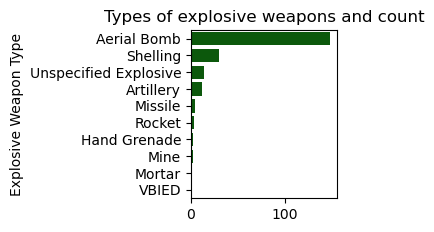

In [15]:
plt.Figure(figsize=(12,6))
plt.subplot(2, 3, 4)
Eplosive_wapons_count = df_Explosive_weapons["Explosive Weapon Type"].value_counts().head(10)
sns.barplot(y=Eplosive_wapons_count.index, x=Eplosive_wapons_count.values, color="darkgreen")
plt.title("Types of explosive weapons and count")

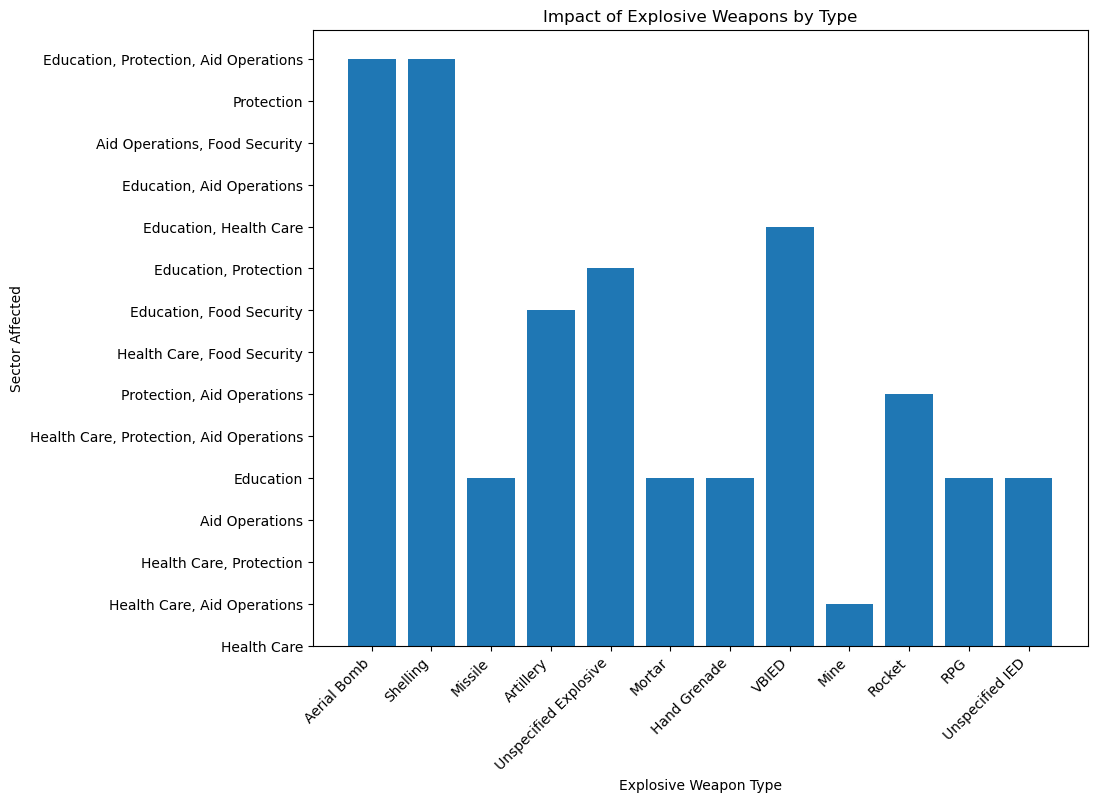

In [26]:
plt.figure(figsize=(10, 8))  

# Create a bar chart
plt.bar(x=df_Explosive_weapons['Explosive Weapon Type'], height=df_Explosive_weapons['Sector Affected'])

# Add labels and title for clarity
plt.xlabel('Explosive Weapon Type')
plt.ylabel('Sector Affected')
plt.title('Impact of Explosive Weapons by Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  

# Show the plot
plt.show()

### Creating a Model

In [ ]:
y=df_Explosive_weapons['Explosive Weapon Type']
X=df_Explosive_weapons.drop(['Explosive Weapon Type'],axis=1)# My target column

In [18]:
le=LabelEncoder()
y_encoded=le.fit_transform(y)

X_encoded = pd.get_dummies(X,drop_first=True).astype (int)

In [19]:
X_encoded

,Date,SiND Event ID,Country_DRC,Country_Ethiopia,Country_Israel,Country_Myanmar,Country_Nigeria,Country_OPT,Country_Russia,Country_Sudan,...,Reported Perpetrator Name_Sudan People's Liberation Movement - North,Reported Perpetrator Name_Syrian National Army (SNA),Reported Perpetrator Name_Unidentified Armed Actor,Affected_Education Infrastructure,Affected_Food Infrastructure,Affected_Health Infrastructure,Affected_Health Worker,Affected_Multiple,Affected_Other,Affected_Protection Infrastructure
0,1744848000000000000,94309,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1743033600000000000,93618,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1742774400000000000,93617,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1742774400000000000,94277,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1742688000000000000,93625,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1735862400000000000,88235,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
215,1735776000000000000,91706,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
216,1735776000000000000,91548,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
217,1735776000000000000,92677,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


### Checking the correlation of the target Columns with others

In [20]:
df_corr = pd.DataFrame(X_encoded)
df_corr['Explosive Weapon Type'] = y_encoded

df_corr.corr()['Explosive Weapon Type']

Date                                  0.061796
SiND Event ID                        -0.041515
Country_DRC                           0.178378
Country_Ethiopia                     -0.058269
Country_Israel                       -0.040773
                                        ...   
Affected_Health Worker                0.055796
Affected_Multiple                    -0.066337
Affected_Other                        0.032388
Affected_Protection Infrastructure   -0.070948
Explosive Weapon Type                 1.000000
Name: Explosive Weapon Type, Length: 299, dtype: float64

### Splitting data and doing the train using different models

In my analysis, I split the dataset into training and testing sets using `train_test_split`. This ensures I can validate my model's performance on unseen data.

In [21]:
#Splitting the data into training and testing sets

X_train,X_test,y_train,y_test=train_test_split(X_encoded,y_encoded,random_state=42,test_size=0.2,)

### Logical Regression

In [22]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred =logistic_regression.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc) 
print(classification_report(y_test,y_pred))

0.7727272727272727
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        34
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.77        44
   macro avg       0.10      0.12      0.11        44
weighted avg       0.60      0.77      0.67        44



/home/alex/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alex/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alex/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


I implemented a Logistic Regression model and made predictions on the test dataset. 

### Overall Accuracy

The overall accuracy is **0.77**, with a weighted average precision of **0.77** and recall of **0.77**. This indicates a good balance between precision and recall, demonstrating effective class distinction. Further tuning could enhance these results, ensuring robustness in real-world applications.

### Decision Tree

In [23]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,y_train)
y_pred =d_tree.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc) 
print(classification_report(y_test,y_pred))

0.8181818181818182
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.50      0.33      0.40         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.17      0.50      0.25         2
           9       0.50      1.00      0.67         1

    accuracy                           0.82        44
   macro avg       0.24      0.31      0.26        44
weighted avg       0.83      0.82      0.81        44



/home/alex/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alex/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alex/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alex/anaconda3/lib/py

### Accuracy

The overall accuracy of the Decision Tree model is **0.82**, indicating that 80% of the predictions made on the test dataset are correct.

### Model Accuracy Comparison

- **Logistic Regression Accuracy**: **0.77**
  - The Logistic Regression model correctly predicts 77% of the instances in the test dataset. While this shows a reasonable level of performance, there is room for improvement, especially in distinguishing between classes.

- **Decision Tree Accuracy**: **0.82**
  - The Decision Tree model achieves an accuracy of 82%, indicating that it correctly predicts 82% of the instances. This improvement suggests that the Decision Tree is better at capturing the underlying patterns in the data.

The Decision Tree model outperforms the Logistic Regression model by 3 percentage points, achieving an accuracy of 82% compared to 77%. This suggests that the Decision Tree may be more effective for this particular dataset and problem.

### Random Forest

In [24]:
Random_forest = RandomForestClassifier()
Random_forest.fit(X_train,y_train)
y_pred =Random_forest.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc) 
print(classification_report(y_test,y_pred))

0.8636363636363636
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.33      0.50         3
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.33      1.00      0.50         2
           9       1.00      1.00      1.00         1

    accuracy                           0.86        44
   macro avg       0.41      0.42      0.37        44
weighted avg       0.84      0.86      0.83        44



/home/alex/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alex/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alex/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### My Conclusion 

- **Logistic Regression** achieved an accuracy of **77%**, indicating decent performance but some room for improvement. This model may struggle with complexities in the data due to its linear nature, which limits its ability to capture non-linear relationships.

- **Decision Tree** improved to an accuracy of **82%**, showing better handling of the data. This model can capture non-linear patterns and interactions between features, but it is prone to overfitting, especially with deeper trees.

- **Random Forest** outperformed both with an accuracy of **86%**, demonstrating the effectiveness of ensemble methods in capturing complex patterns in the data. By combining the predictions of multiple decision trees, this model reduces overfitting and enhances generalization, leading to improved performance across various metrics.

Overall, the Random Forest model provides the best performance across all metrics, indicating it is the most robust choice for this dataset. Its ability to handle a diverse range of data characteristics makes it particularly suitable for complex classification tasks.

### Next Steps After Creating Models

1. **Try Combining Models**:
   - Experiment with different models together to get even better results.

2. **Improve Features**:
   - Look for new ways to create or modify features that might help my model perform better.

3. **Add More Data**:
   - If possible, increase my dataset size or balance classes to strengthen my model.

4. **Monitor Performance**:
   - Keep an eye on how well the model works over time and adjust as needed.

5. **Think About Ethics**:
   - Consider the ethical side of my model’s predictions to avoid bias and ensure fairness.

6. **Keep Learning**:
    - Stay updated on new trends and techniques in data science to keep improving my models.
